## Useful functions

You don't need to change these functions, and you don't have to necessarilty use them to complete your assignment. 

In [28]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score

# plot one or more features (using separate plots) for a start and end date, if y is set then it shows the anomalies
def plot_features(df, start_day, start_year, end_day, end_year, features, y=None):
    # Filter the period
    mask = (
        (df['year'] > start_year) | 
        ((df['year'] == start_year) & (df['day_of_year'] >= start_day))
    ) & (
        (df['year'] < end_year) | 
        ((df['year'] == end_year) & (df['day_of_year'] <= end_day))
    )
    df_period = df[mask].copy()
    df_period = df_period.reset_index(drop=False)  # Keep original indices for mapping y
    df_period['date'] = pd.to_datetime(
        df_period['year'].astype(int).astype(str) + df_period['day_of_year'].astype(int).astype(str).str.zfill(3), format='%Y%j')

    if isinstance(features, str):
        features = [features]

    for feature in features:
        plt.figure(figsize=(10, 4))
        plt.plot(df_period['date'], df_period[feature], marker='o', linestyle='-')

        # If y is provided, plot anomalies
        if y is not None:
            anomaly_indices = df_period[df_period['index'].map(lambda idx: y[idx] == -1)].index
            plt.scatter(
                df_period.loc[anomaly_indices, 'date'],
                df_period.loc[anomaly_indices, feature],
                color='red', marker='x', s=100, label='Anomaly'
            )
            plt.legend()

        plt.title(f'{feature} over time')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# show a summary of the dataset, not crucial, but useful to understand the data
def print_dataset_summary(y, df=None):
    total = len(y)
    n_anomalies = (y == -1).sum()
    n_normals = (y == 1).sum()

    print("Dataset Summary:")
    print(f"Total instances:         {total}")
    print(f"Normal instances (1):    {n_normals}")
    print(f"Anomalous instances (-1): {n_anomalies}")
    print(f"Anomaly ratio:           {n_anomalies / total:.3%}")

    if df is not None:
        print("\n Feature Statistics (All Data):")
        print(df.describe(include='all').T)

        print("\n Feature Statistics (Anomalies Only):")
        print(df[y == -1].describe(include='all').T)

        print("\nFeature Statistics (Normal Only):")
        print(df[y == 1].describe(include='all').T)

# plot detections, useful when you already have the predictions and want to observe then on the data for each feature
def plot_detection(df, y_true, y_pred, start_day, start_year, end_day, end_year, feature):
    mask = (
        (df['year'] > start_year) | 
        ((df['year'] == start_year) & (df['day_of_year'] >= start_day))
    ) & (
        (df['year'] < end_year) | 
        ((df['year'] == end_year) & (df['day_of_year'] <= end_day))
    )
    df_period = df[mask].copy()
    idx_period = df_period.index
    df_period['date'] = pd.to_datetime(
    df_period['year'].astype(int).astype(str) + df_period['day_of_year'].astype(int).astype(str).str.zfill(3), format='%Y%j')
    y_true_period = y_true[idx_period]
    y_pred_period = y_pred[idx_period]

    correct = (y_true_period == -1) &  (y_pred_period == -1)
    missed = (y_true_period == -1) & (y_pred_period != -1)
    false_pos = (y_true_period != -1) & (y_pred_period == -1)

    plt.figure(figsize=(10, 4))
    plt.plot(df_period['date'], df_period[feature], label=feature, color='blue', linestyle='-')
    plt.scatter(df_period.loc[correct, 'date'], df_period.loc[correct, feature], 
                marker='x', color='green', label='Correct Anomaly')
    plt.scatter(df_period.loc[missed, 'date'], df_period.loc[missed, feature], 
                marker='x', color='red', label='Missed Anomaly')
    plt.scatter(df_period.loc[false_pos, 'date'], df_period.loc[false_pos, feature], 
                marker='x', color='orange', label='False Positive')

    plt.title(f'{feature} with Detected Anomalies')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# to facilitate the visualization of the results for the anomaly detection methods in part 1
def evaluate_predictions(y_true, y_pred, model_name="unnamed", header=True):
    # convert from -1 to 1 (1 for anomaly, 0 for normal) for evaluating
    y_true_binary = (y_true == -1).astype(int)
    y_pred_binary = (y_pred == -1).astype(int)

    recall = recall_score(y_true_binary, y_pred_binary)
    precision = precision_score(y_true_binary, y_pred_binary)

    correct = (y_true == -1) & (y_pred == -1)
    missed = (y_true == -1) & (y_pred != -1)
    false_positives = (y_true != -1) & (y_pred == -1)

    if header:
        print("| Model | Recall | Precision | Correct | Missed | False Positives |")
        print("|-------|--------|-----------|---------|--------|------------------|")
    
    print(f"| {model_name} | {recall:.3f} | {precision:.3f} | {correct.sum()} | {missed.sum()} | {false_positives.sum()} |")

# 

## Example: reading and visualizing the data

In [29]:
import os
import pandas as pd

df2122 = None
y2122 = None

# Check and load if files exist
if os.path.exists("GenSyn2122.csv") and os.path.exists("GenSyn_labels2122.csv"):
    print("Loading GenSyn2122 dataset...")
    df2122 = pd.read_csv("GenSyn2122.csv")
    y2122 = pd.read_csv("GenSyn_labels2122.csv")['anomaly_label'].values
    anomaly_info_df2122 = pd.read_csv("GenSyn_labels2122.csv")


# Visualise part of the data...
# plot_features(df2122, 1, 2021, 100, 2021, ['temperature','energy_usage', 'season'])
display(df2122)

Loading GenSyn2122 dataset...


,year,day_of_year,season,temperature,humidity,energy_usage
0,2021,1,summer,19.708638,78.625889,11.731837
1,2021,2,summer,20.703554,78.350411,13.453957
2,2021,3,summer,21.339178,82.736788,15.393096
3,2021,4,summer,20.823304,79.921728,16.657684
4,2021,5,summer,22.277698,80.406175,16.927320
...,...,...,...,...,...,...
725,2022,361,summer,24.648768,79.422802,18.579817
726,2022,362,summer,24.362897,80.541095,19.394421
727,2022,363,summer,24.730546,85.748327,20.060006
728,2022,364,summer,26.975549,81.506959,20.840548


# Part 1: Anomaly detection

## a)

In [30]:
import os
import pandas as pd

df2122 = None
y2122 = None

# Check and load if files exist
if os.path.exists("GenSyn2122.csv") and os.path.exists("GenSyn_labels2122.csv"):
    print("Loading GenSyn2122 dataset...")
    df2122 = pd.read_csv("GenSyn2122.csv")
    y2122 = pd.read_csv("GenSyn_labels2122.csv")['anomaly_label'].values
    anomaly_info_df2122 = pd.read_csv("GenSyn_labels2122.csv")

Loading GenSyn2122 dataset...


In [31]:
# Step 1: Make a copy so we don't modify the original
df_clean = df2122.copy()

# Step 2: One-hot encode the nominal 'season' column
df_clean = pd.get_dummies(df_clean, columns=['season'], drop_first=True)

# Step 3: Transform 'day_of_year' into cyclical features
import numpy as np

df_clean['day_sin'] = np.sin(2 * np.pi * df_clean['day_of_year'] / 365)
df_clean['day_cos'] = np.cos(2 * np.pi * df_clean['day_of_year'] / 365)

# Drop the original 'day_of_year' column
df_clean = df_clean.drop(columns=['day_of_year'])

# Optional: preview result
df_clean.head()

,year,temperature,humidity,energy_usage,season_spring,season_summer,season_winter,day_sin,day_cos
0,2021,19.708638,78.625889,11.731837,False,True,False,0.017213,0.999852
1,2021,20.703554,78.350411,13.453957,False,True,False,0.034422,0.999407
2,2021,21.339178,82.736788,15.393096,False,True,False,0.051620,0.998667
3,2021,20.823304,79.921728,16.657684,False,True,False,0.068802,0.997630
4,2021,22.277698,80.406175,16.927320,False,True,False,0.085965,0.996298


In [32]:
print(df_clean.dtypes)

year               int64
temperature      float64
humidity         float64
energy_usage     float64
season_spring       bool
season_summer       bool
season_winter       bool
day_sin          float64
day_cos          float64
dtype: object


In [33]:
X_anomaly = df_clean.copy()  # this will be your input for the models

In [34]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest (unsupervised!)
isoforest = IsolationForest(random_state=42, contamination='auto')
isoforest.fit(df_clean)
y_pred_if = isoforest.predict(df_clean)

# Evaluate
evaluate_predictions(y2122, y_pred_if, model_name="IsolationForest")

| Model | Recall | Precision | Correct | Missed | False Positives |
|-------|--------|-----------|---------|--------|------------------|
| IsolationForest | 0.944 | 0.047 | 17 | 1 | 348 |


In [35]:
from sklearn.neighbors import LocalOutlierFactor

# LOF is different — it does NOT have a .fit_predict method the same way
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred_lof = lof.fit_predict(df_clean)

# Evaluate
evaluate_predictions(y2122, y_pred_lof, model_name="LOF", header=False)

| LOF | 0.444 | 0.276 | 8 | 10 | 21 |


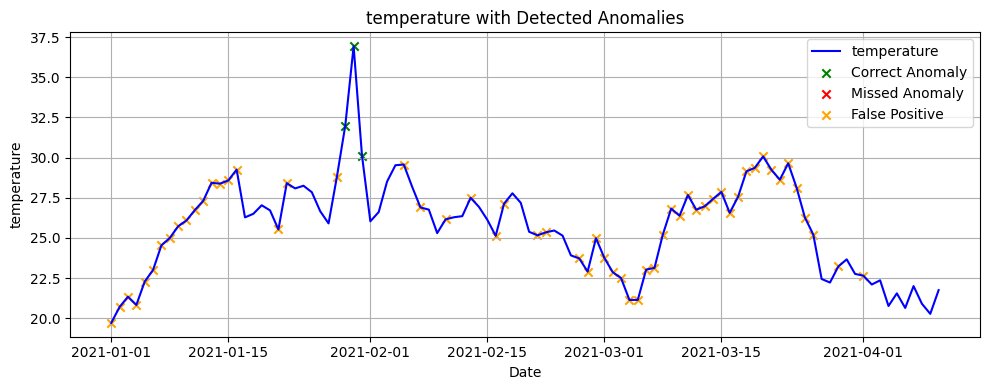

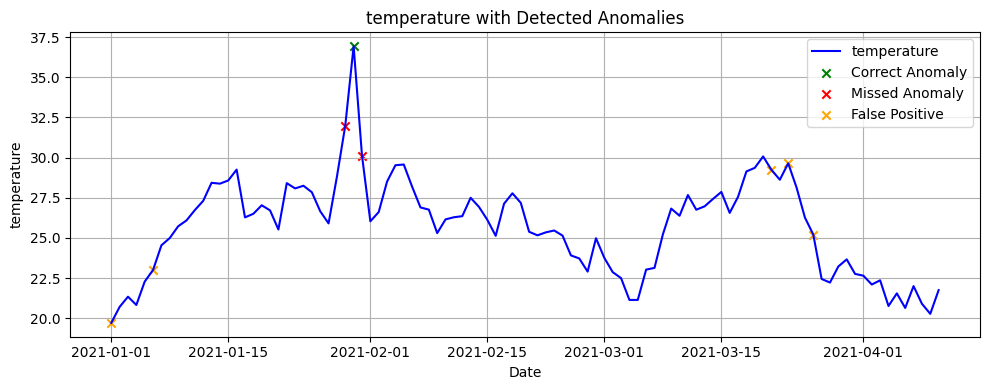

In [36]:
plot_detection(df2122, y2122, y_pred_if, 1, 2021, 100, 2021, 'temperature')
plot_detection(df2122, y2122, y_pred_lof, 1, 2021, 100, 2021, 'temperature')

## b)

## c)

In [37]:
contamination_values = [0.03, 0.1]
estimators_range = [100, 200, 300, 400, 500]
neighbors_range = [5, 10, 20, 30, 40, 50]

In [38]:
from sklearn.ensemble import IsolationForest

print("### Isolation Forest Results ###")
for cont in contamination_values:
    print(f"\nContamination = {cont}")
    print("| Model | Recall | Precision | Correct | Missed | False Positives |")
    print("|-------|--------|-----------|---------|--------|------------------|")
    
    for n in estimators_range:
        model = IsolationForest(n_estimators=n, contamination=cont, random_state=42)
        model.fit(df_clean)
        y_pred = model.predict(df_clean)
        evaluate_predictions(y2122, y_pred, model_name=f"IF (est={n})", header=False)

### Isolation Forest Results ###

Contamination = 0.03
| Model | Recall | Precision | Correct | Missed | False Positives |
|-------|--------|-----------|---------|--------|------------------|
| IF (est=100) | 0.278 | 0.227 | 5 | 13 | 17 |
| IF (est=200) | 0.222 | 0.182 | 4 | 14 | 18 |
| IF (est=300) | 0.222 | 0.182 | 4 | 14 | 18 |
| IF (est=400) | 0.222 | 0.182 | 4 | 14 | 18 |
| IF (est=500) | 0.222 | 0.182 | 4 | 14 | 18 |

Contamination = 0.1
| Model | Recall | Precision | Correct | Missed | False Positives |
|-------|--------|-----------|---------|--------|------------------|
| IF (est=100) | 0.556 | 0.137 | 10 | 8 | 63 |
| IF (est=200) | 0.611 | 0.151 | 11 | 7 | 62 |
| IF (est=300) | 0.667 | 0.164 | 12 | 6 | 61 |
| IF (est=400) | 0.667 | 0.164 | 12 | 6 | 61 |
| IF (est=500) | 0.667 | 0.164 | 12 | 6 | 61 |


In [39]:
from sklearn.neighbors import LocalOutlierFactor

print("### Local Outlier Factor Results ###")
for cont in contamination_values:
    print(f"\nContamination = {cont}")
    print("| Model | Recall | Precision | Correct | Missed | False Positives |")
    print("|-------|--------|-----------|---------|--------|------------------|")
    
    for n in neighbors_range:
        model = LocalOutlierFactor(n_neighbors=n, contamination=cont)
        y_pred = model.fit_predict(df_clean)
        evaluate_predictions(y2122, y_pred, model_name=f"LOF (k={n})", header=False)

### Local Outlier Factor Results ###

Contamination = 0.03
| Model | Recall | Precision | Correct | Missed | False Positives |
|-------|--------|-----------|---------|--------|------------------|
| LOF (k=5) | 0.444 | 0.364 | 8 | 10 | 14 |
| LOF (k=10) | 0.444 | 0.364 | 8 | 10 | 14 |
| LOF (k=20) | 0.333 | 0.273 | 6 | 12 | 16 |
| LOF (k=30) | 0.278 | 0.227 | 5 | 13 | 17 |
| LOF (k=40) | 0.278 | 0.227 | 5 | 13 | 17 |
| LOF (k=50) | 0.333 | 0.273 | 6 | 12 | 16 |

Contamination = 0.1
| Model | Recall | Precision | Correct | Missed | False Positives |
|-------|--------|-----------|---------|--------|------------------|
| LOF (k=5) | 0.611 | 0.151 | 11 | 7 | 62 |
| LOF (k=10) | 0.611 | 0.151 | 11 | 7 | 62 |
| LOF (k=20) | 0.444 | 0.110 | 8 | 10 | 65 |
| LOF (k=30) | 0.611 | 0.151 | 11 | 7 | 62 |
| LOF (k=40) | 0.611 | 0.151 | 11 | 7 | 62 |
| LOF (k=50) | 0.611 | 0.151 | 11 | 7 | 62 |


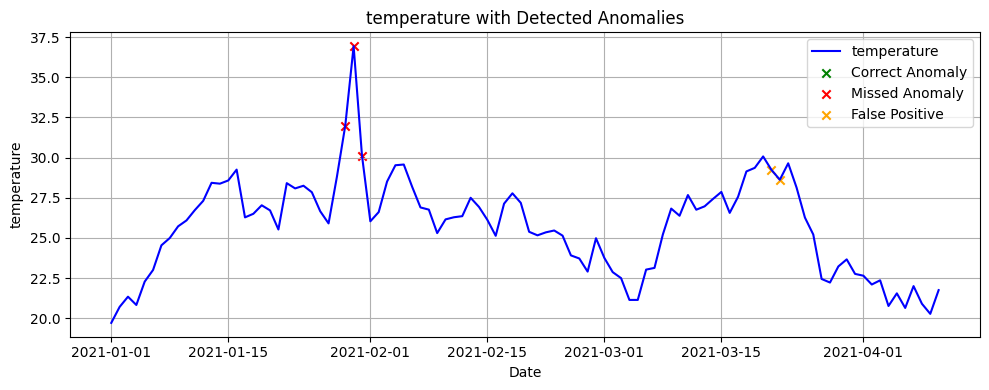

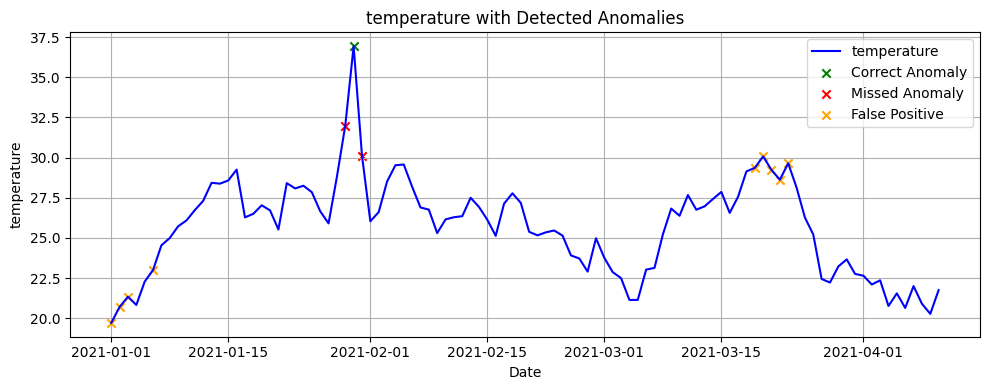

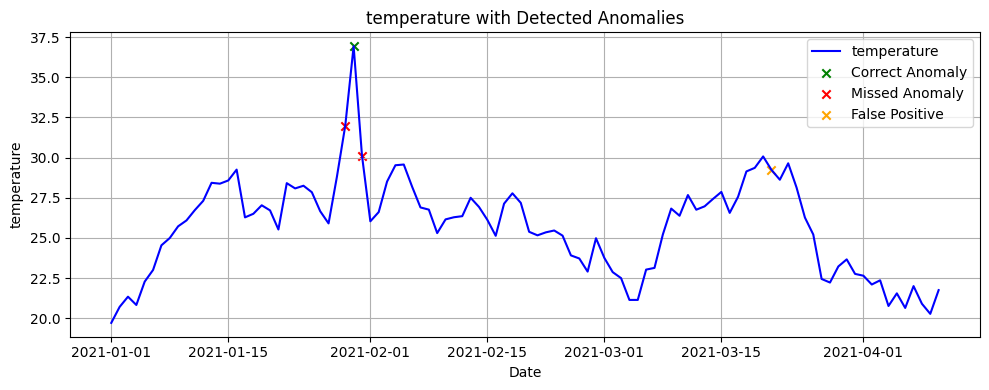

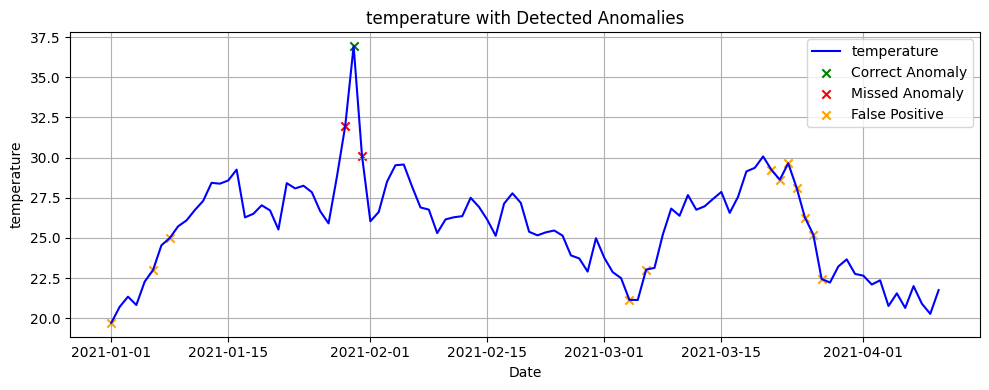

In [41]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# 1. Isolation Forest: est=100, cont=0.03
model_if_conservative = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
model_if_conservative.fit(df_clean)
y_pred_if_conservative = model_if_conservative.predict(df_clean)
plot_detection(df2122, y2122, y_pred_if_conservative, 1, 2021, 100, 2021, 'temperature')

# 2. Isolation Forest: est=300, cont=0.1
model_if_best = IsolationForest(n_estimators=300, contamination=0.1, random_state=42)
model_if_best.fit(df_clean)
y_pred_if_best = model_if_best.predict(df_clean)
plot_detection(df2122, y2122, y_pred_if_best, 1, 2021, 100, 2021, 'temperature')

# 3. LOF: k=5, cont=0.03
model_lof_conservative = LocalOutlierFactor(n_neighbors=5, contamination=0.03)
y_pred_lof_conservative = model_lof_conservative.fit_predict(df_clean)
plot_detection(df2122, y2122, y_pred_lof_conservative, 1, 2021, 100, 2021, 'temperature')

# 4. LOF: k=10, cont=0.1
model_lof_best = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
y_pred_lof_best = model_lof_best.fit_predict(df_clean)
plot_detection(df2122, y2122, y_pred_lof_best, 1, 2021, 100, 2021, 'temperature')



## d)

## e) (AIML420 mandatory) 

# Part 2: Neural Networks

## a)

In [42]:
import pandas as pd

# Load SeaSyn datasets
train_df = pd.read_csv("SeaSynTrain.csv")
test_df = pd.read_csv("SeaSynTest.csv")

# Split into features (X) and labels (y)
X_train = train_df[['attrib1', 'attrib2', 'attrib3']].values
y_train = train_df['class'].values

X_test = test_df[['attrib1', 'attrib2', 'attrib3']].values
y_test = test_df['class'].values

In [43]:
import numpy as np

class Perceptron:
    def __init__(self, lr=0.01, epochs=1):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = 1 if linear_output > 0 else 0
                update = self.lr * (target - y_pred)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output > 0, 1, 0)

In [44]:
from sklearn.metrics import accuracy_score

epoch_list = [1, 5, 10, 15, 20, 50, 60, 80, 100, 120, 150, 200]
results = []

for epoch in epoch_list:
    p = Perceptron(lr=0.01, epochs=epoch)
    p.fit(X_train, y_train)
    y_pred = p.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((epoch, acc))

# Show results
import pandas as pd
df_results = pd.DataFrame(results, columns=["Epoch", "Accuracy"])
df_results

,Epoch,Accuracy
0,1,0.650
1,5,0.675
2,10,0.850
3,15,0.675
4,20,0.700
5,50,0.850
6,60,0.675
7,80,0.825
8,100,0.875
9,120,0.775


## b)

In [46]:
print(df_train_ring.columns)

Index(['feature1', 'feature2', 'class'], dtype='object')


In [48]:
# Load RingSyn datasets
df_train_ring = pd.read_csv("RingSynTrain.csv")
df_test_ring = pd.read_csv("RingSynTest.csv")

# Features and labels
X_train_ring = df_train_ring[['feature1', 'feature2']].values
y_train_ring = df_train_ring['class'].values

X_test_ring = df_test_ring[['feature1', 'feature2']].values
y_test_ring = df_test_ring['class'].values



In [49]:
epoch_list_ring = [1, 5, 10, 15, 20, 50, 60, 80, 100, 120, 150, 200]
results_ring = []

for epoch in epoch_list_ring:
    p = Perceptron(lr=0.01, epochs=epoch)
    p.fit(X_train_ring, y_train_ring)
    y_pred = p.predict(X_test_ring)
    acc = accuracy_score(y_test_ring, y_pred)
    results_ring.append((epoch, acc))

# Display results
df_results_ring = pd.DataFrame(results_ring, columns=["Epoch", "Accuracy"])
df_results_ring


,Epoch,Accuracy
0,1,0.656667
1,5,0.656667
2,10,0.656667
3,15,0.696667
4,20,0.706667
5,50,0.656667
6,60,0.656667
7,80,0.710000
8,100,0.656667
9,120,0.656667


## c) (AIML420 mandatory) 